# Ejemplo de regresión lineal con el dataset de california housing

In [46]:
# para instalar sklearn
#! pip install scikit-learn

In [47]:
# import de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# usaremos la librería sklearn para nuestro modelo de regresión
# !pip install scikit-learn para instalar
from sklearn.datasets import fetch_california_housing # dentro del módulo sklearn hay varios datasets disponibles
from sklearn.model_selection import train_test_split # parte de la metodología de machine learning
from sklearn.linear_model import LinearRegression #el objeto para hacer la regresión
from statsmodels.formula.api import ols


In [4]:

# 1. Cargar el dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:

# 2. Mostrar las variables
print("Variables en el dataset:")
print(df.columns)


Variables en el dataset:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


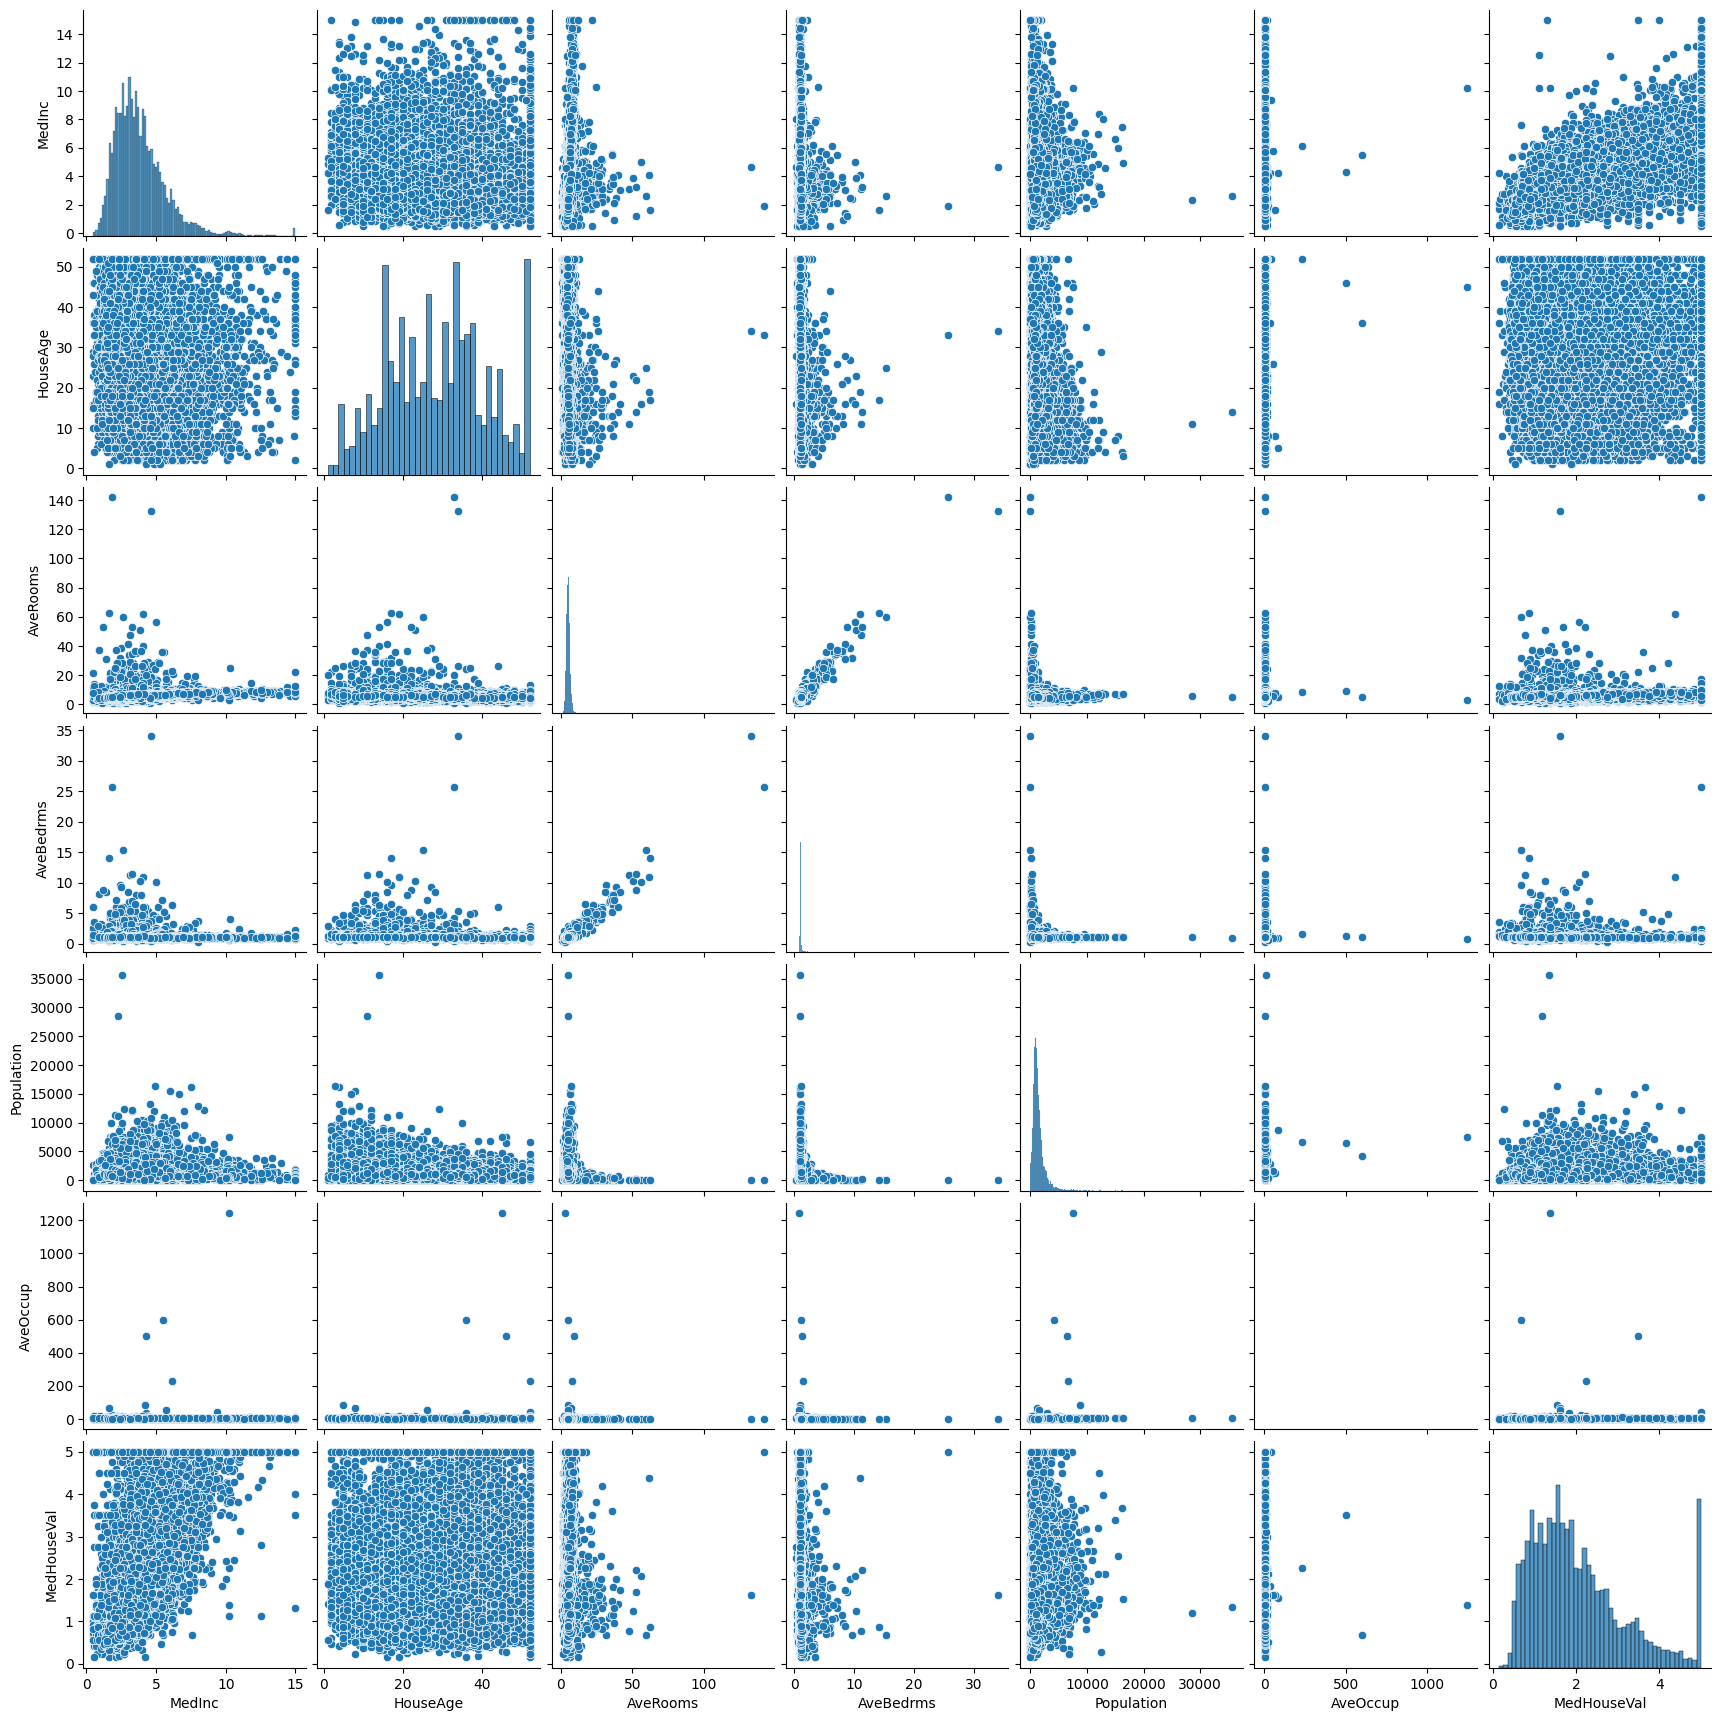

In [7]:

# 3. Gráfica pairplot
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']])
plt.show()


## Regresión lineal simple

In [8]:

# 4. Regresión lineal simple (Mediana de ingresos vs Precio medio de la vivienda)
X = df[['MedInc']]  # Variable independiente
y = df['MedHouseVal']  # Variable dependiente (respuesta)


In [9]:

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción
y_pred = lr.predict(X_test)
y_pred

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

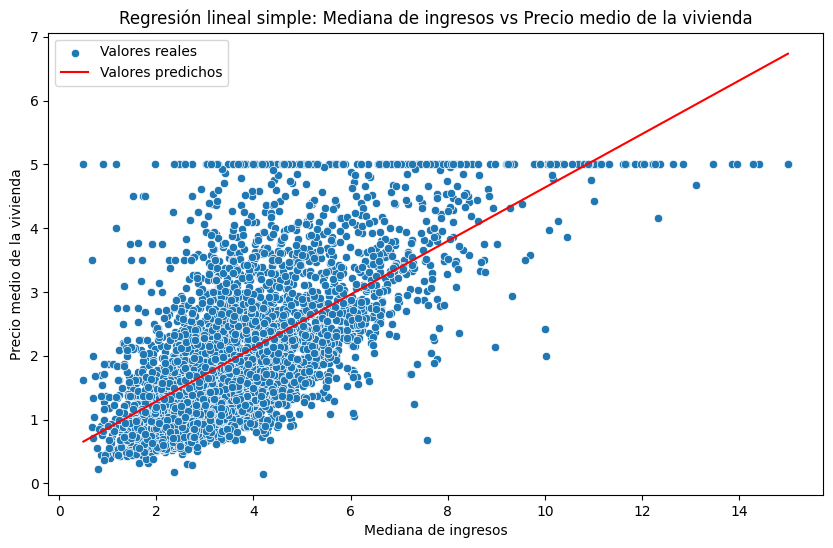

In [10]:

# Gráfica de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['MedInc'], y=y_test, label='Valores reales')
sns.lineplot(x=X_test['MedInc'], y=y_pred, color='red', label='Valores predichos')
plt.title('Regresión lineal simple: Mediana de ingresos vs Precio medio de la vivienda')
plt.xlabel('Mediana de ingresos')
plt.ylabel('Precio medio de la vivienda')
plt.legend()
plt.show()


In [34]:

# 5. Validar supuestos de la regresión lineal
# Residuos
resultados = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
resultados["residuals"] = resultados.y_test - resultados.y_pred
resultados.reset_index(drop=True, inplace = True)
resultados

,y_test,y_pred,residuals
0,0.47700,1.149589,-0.672589
1,0.45800,1.506069,-1.048069
2,5.00001,1.903937,3.096073
3,2.18600,2.850594,-0.664594
4,2.78000,2.006633,0.773367
...,...,...,...
4123,2.63300,2.375651,0.257349
4124,2.66800,1.587966,1.080034
4125,5.00001,4.315008,0.685002
4126,0.72300,1.612455,-0.889455


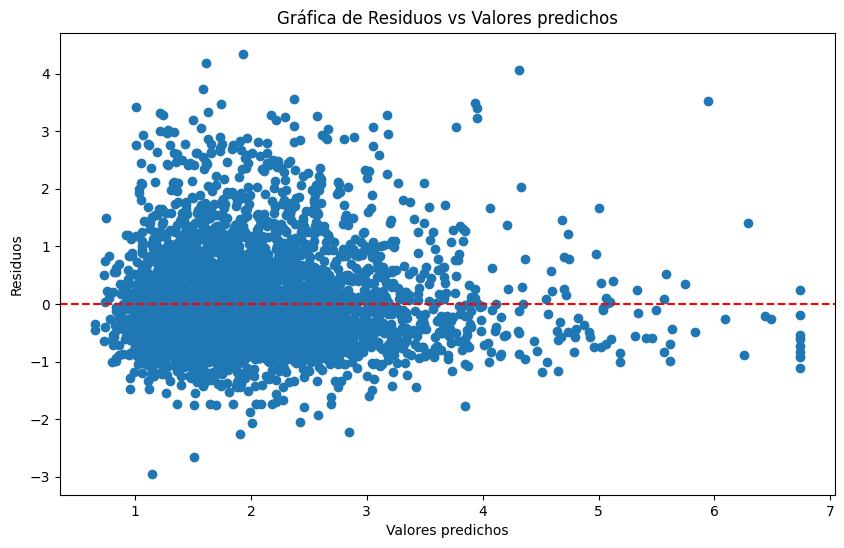

In [40]:

# Supuesto 1: Linealidad (gráfica de dispersión)
plt.figure(figsize=(10, 6))
plt.scatter(resultados.y_pred, resultados.residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfica de Residuos vs Valores predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()


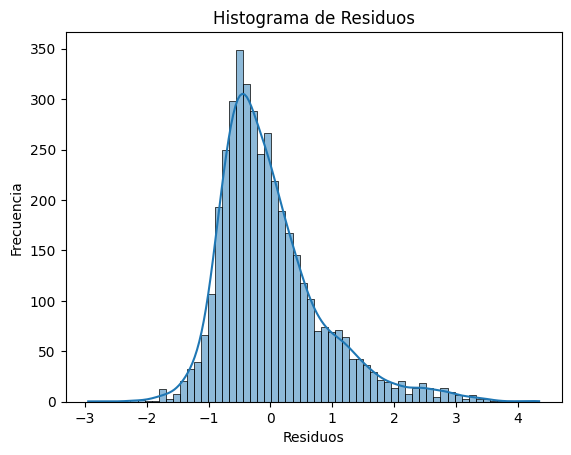

In [39]:

# Supuesto 2: Homocedasticidad (gráfica de residuos)
sns.histplot(resultados.residuals, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


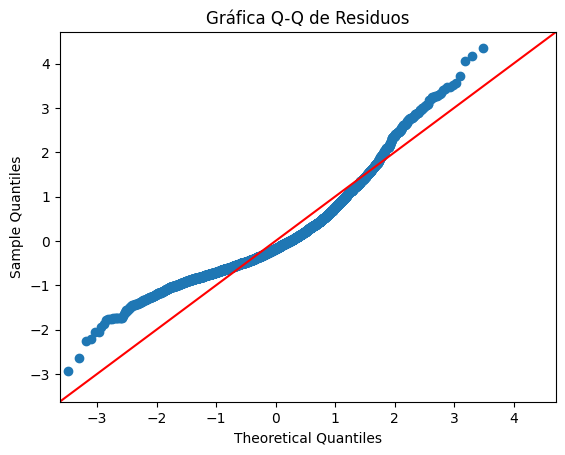

In [38]:

# Supuesto 3: Normalidad de residuos
sm.qqplot(resultados.residuals, line ='45')
plt.title('Gráfica Q-Q de Residuos')
plt.show()


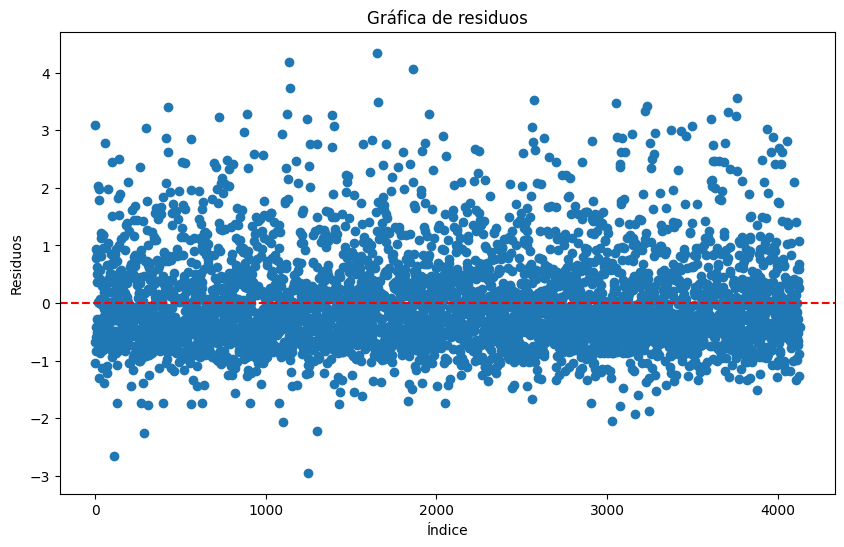

In [37]:

# Supuesto 4: Independencia de errores
plt.figure(figsize=(10, 6))
plt.scatter(resultados.index, resultados.residuals, marker = "o")
plt.title('Gráfica de residuos')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [50]:

# ANOVA para validar los coeficientes
data = X_train
data["y"] = y_train
model = ols("y~MedInc", data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Tabla ANOVA para Regresión Lineal Simple:")
print(anova_table)


Tabla ANOVA para Regresión Lineal Simple:
                sum_sq       df           F  PR(>F)
MedInc    10528.604266      1.0  15057.4391     0.0
Residual  11544.277567  16510.0         NaN     NaN


## Regresión lineal múltiple

In [51]:

# 6. Regresión lineal múltiple
X_multi = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Variables independientes
y_multi = df['MedHouseVal']  # Variable dependiente


In [52]:

# Separar en conjunto de entrenamiento y prueba
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Ajustar el modelo
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

# Predicción
y_pred_multi = lr_multi.predict(X_test_multi)
y_pred_multi

array([1.06317056, 1.50730032, 2.33746171, ..., 4.34388357, 1.71503202,
       1.76774256])

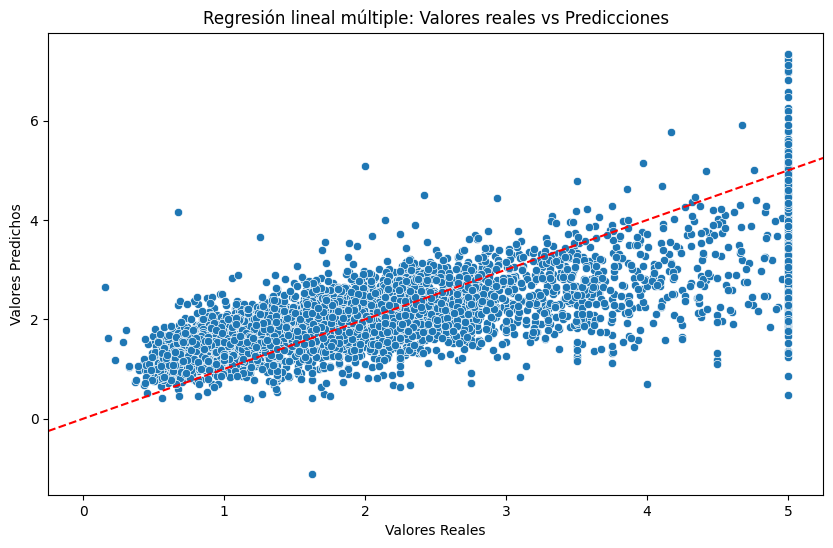

In [53]:

# Gráfica de resultados de regresión múltiple (MedInc vs MedHouseVal)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_multi, y=y_pred_multi)
plt.axline((0,0), slope=1, color='red', linestyle='--')  # Línea de identidad
plt.title('Regresión lineal múltiple: Valores reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()


In [72]:

# Validar supuestos de la regresión lineal múltiple
resultados_multi = pd.DataFrame({'y_test': y_test_multi, 'y_pred': y_pred_multi})
resultados_multi["residuals"] = resultados_multi.y_test - resultados_multi.y_pred
resultados_multi.reset_index(drop = True, inplace = True)
resultados_multi


,y_test,y_pred,residuals
0,0.47700,1.063171,-0.586171
1,0.45800,1.507300,-1.049300
2,5.00001,2.337462,2.662548
3,2.18600,2.680768,-0.494768
4,2.78000,2.094608,0.685392
...,...,...,...
4123,2.63300,2.137418,0.495582
4124,2.66800,1.530891,1.137109
4125,5.00001,4.343884,0.656126
4126,0.72300,1.715032,-0.992032


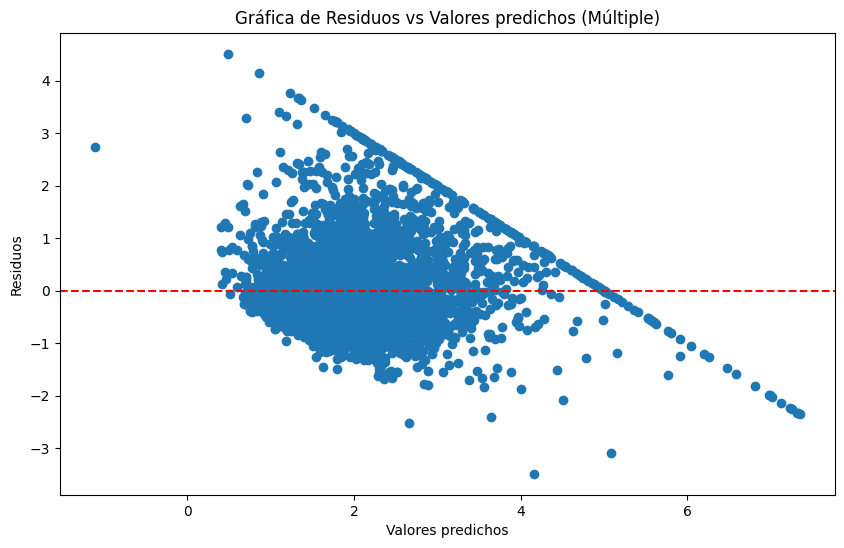

In [73]:

# Supuesto 1: Linealidad
plt.figure(figsize=(10, 6))
plt.scatter(resultados_multi.y_pred, resultados_multi.residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfica de Residuos vs Valores predichos (Múltiple)')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()


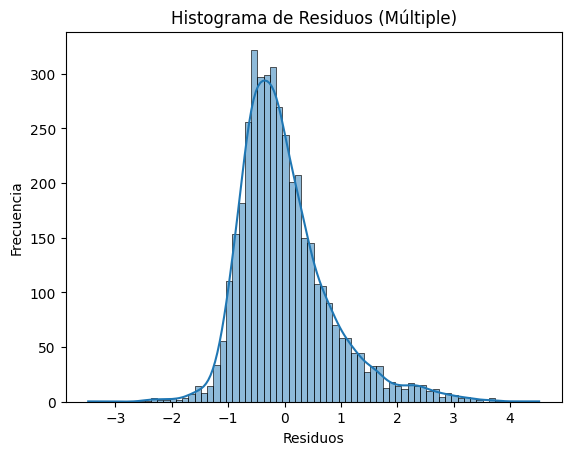

In [69]:

# Supuesto 2: Homocedasticidad
sns.histplot(resultados_multi.residuals, kde=True)
plt.title('Histograma de Residuos (Múltiple)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


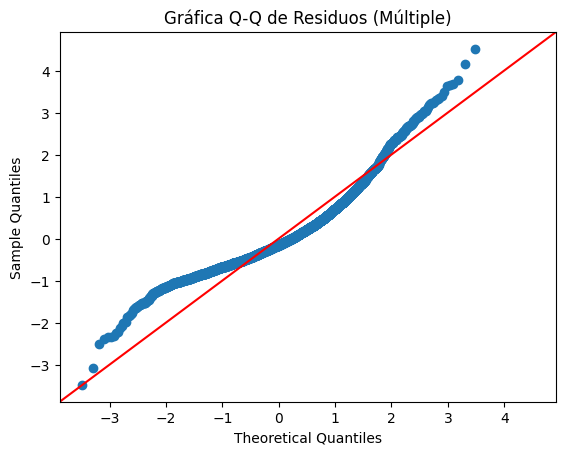

In [76]:

# Supuesto 3: Normalidad de residuos
sm.qqplot(resultados_multi.residuals, line ='45')
plt.title('Gráfica Q-Q de Residuos (Múltiple)')
plt.show()


In [77]:
resultados_multi

,y_test,y_pred,residuals
0,0.47700,1.063171,-3.483444
1,0.45800,1.507300,-3.089333
2,5.00001,2.337462,-2.510791
3,2.18600,2.680768,-2.398247
4,2.78000,2.094608,-2.349780
...,...,...,...
4123,2.63300,2.137418,3.664781
4124,2.66800,1.530891,3.668571
4125,5.00001,4.343884,3.766155
4126,0.72300,1.715032,4.144018


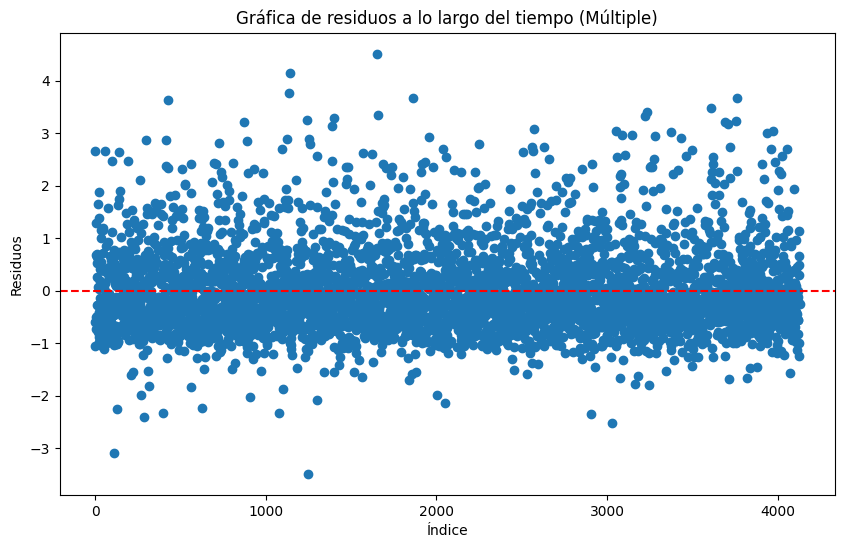

In [75]:

# Supuesto 4: Independencia de errores
plt.figure(figsize=(10, 6))
plt.scatter(resultados_multi.index, resultados_multi.residuals)
plt.title('Gráfica de residuos a lo largo del tiempo (Múltiple)')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [79]:

# ANOVA para validar los coeficientes (Múltiple)
# ANOVA para validar los coeficientes
data = X_train_multi
data["y"] = y_train_multi
model = ols("y~MedInc+HouseAge+AveRooms+AveOccup", data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Tabla ANOVA para Regresión Lineal Simple:")
print(anova_table)



Tabla ANOVA para Regresión Lineal Simple:
                sum_sq       df             F         PR(>F)
MedInc    10476.862503      1.0  16236.598703   0.000000e+00
HouseAge    725.835999      1.0   1124.869954  1.232449e-238
AveRooms     66.125031      1.0    102.477779   5.126802e-24
AveOccup     37.973361      1.0     58.849510   1.796646e-14
Residual  10651.342224  16507.0           NaN            NaN
